In [7]:
from torch import nn
import torch
import matplotlib.pyplot as plt

In [2]:
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
  def forward(self, x : torch.Tensor) -> torch.Tensor:
    return self.weights * x  + self.bias

In [3]:
model_0 = LinearRegression()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [4]:
start = 0
end = 1
step = 0.02
weight = 0.7
bias = 0.3
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [5]:
torch.manual_seed(42)

epoch_count = []
train_loss_values = []
test_loss_values = []
##  epochs
epochs = 100
for epoch in range(epochs) :
  # get the model in the training mode
  model_0.train()
  # forward pass : predict the result
  y_pred = model_0(X_train)
  # calculate the loss function
  loss = loss_fn(y_pred, y_train)
  # optimizer set the optimize gradient to zero
  optimizer.zero_grad()
  # calculate the gradient
  loss.backward()
  # add the gradient
  optimizer.step()
  # enter the evaluation mode
  model_0.eval()

  with torch.inference_mode():
    # predict based on test data
    test_pred = model_0(X_test)
    # calculate the loss
    test_loss = loss_fn(test_pred, y_test)
    # in each epochs
    if epoch % 10 == 0:
      # add the epoch in to array
      epoch_count.append(epoch)
      # add the loss values
      train_loss_values.append(loss.detach().numpy())
      # add the test loss values
      test_loss_values.append(test_loss.detach().numpy())
      print(f"Epoch : {epoch} | Loss : {loss} | Test Loss : {test_loss}")

Epoch : 0 | Loss : 0.9749868512153625 | Test Loss : 1.2765263319015503
Epoch : 10 | Loss : 0.8597769737243652 | Test Loss : 1.1418163776397705
Epoch : 20 | Loss : 0.7445670366287231 | Test Loss : 1.0071064233779907
Epoch : 30 | Loss : 0.6293569803237915 | Test Loss : 0.8723963499069214
Epoch : 40 | Loss : 0.5141469836235046 | Test Loss : 0.737686276435852
Epoch : 50 | Loss : 0.3989369571208954 | Test Loss : 0.6029763221740723
Epoch : 60 | Loss : 0.2837269902229309 | Test Loss : 0.4682663381099701
Epoch : 70 | Loss : 0.16851700842380524 | Test Loss : 0.3335564136505127
Epoch : 80 | Loss : 0.08275888860225677 | Test Loss : 0.22036102414131165
Epoch : 90 | Loss : 0.059505295008420944 | Test Loss : 0.16083170473575592


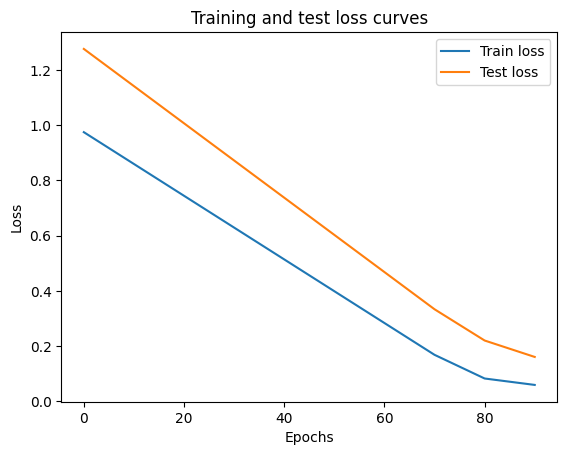

In [8]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();
